In [1]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from wrangle import acquire_and_wrangle
from wrangle import get_weekly_student_activity

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
userlog = acquire_and_wrangle()

## 1 . Which lesson appears to attract the most traffic consistently across cohorts (per program)?
### Takeaway Question 1
- We assume that / has the most hits because it is access to the main site 37496 requests for webdev and 8358 for data science
- The lesson search/search_index.json attracts mmore traffic for the Data  science courses 2203 requests
- The lesson javascript-i   attracts mmore traffic for the web development courses 18193 requests


## 2 . Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
### Takeaway question 2
- For data science, the Darden cohort accessed classification/overview lesson more that other data science cohorts with  1109 requests
- For web Dev, 
* most accessed course is toc Which Jupyter cohort accessed the most with 1866 requests
* next accessed course is search/search_index.json by Apex cohort with   1497 requests
* next most accessed course is javascript-i by Ceres cohort with 1003 requests

## 3.  Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
### Takeaway question 3
- users  were found in the data science program as well as the web dev program that hardly accessed the curriculum 

## 4.  Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

### Takeaway question 4
- No suspicious ip address or unusual activities found. 
- The top 3 most used ip addresses:

- 97.105.19.58       268648 requests used by web dev and data science
- 97.105.19.61        60530 requests exclusively used by web dev 
- 192.171.117.210      9124 requests used by web dev and data science
 

## 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [3]:
webdev_ds_hits, webdev_webdev_hits, ds_ds_hits, ds_webdev_hits = get_weekly_student_activity(userlog)

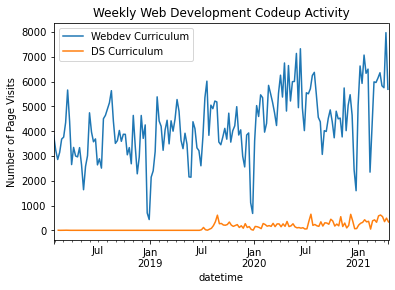

In [6]:
# Resample by week and plot the data from above.
webdev_webdev_hits.resample('7d').path.count().plot(label='Webdev Curriculum')
webdev_ds_hits.resample('7d').path.count().plot(label='DS Curriculum')
plt.title('Weekly Web Development Codeup Activity')
plt.ylabel('Number of Page Visits')
plt.legend()

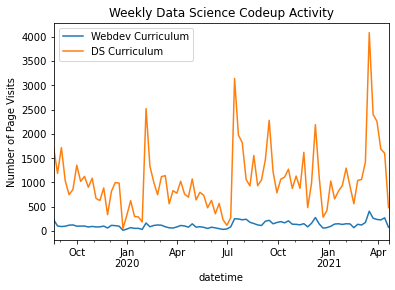

In [7]:
# Resample by week and plot data for Data Science students.
(ds_webdev_hits.resample('7d').path.count()).plot(label='Webdev Curriculum')
(ds_ds_hits.resample('7d').path.count()).plot(label='DS Curriculum')
plt.title('Weekly Data Science Codeup Activity')
plt.ylabel('Number of Page Visits')
plt.legend()